Note: Do not need to split data to train and test for plotting with PCA, t-SNE and UMAP. Only needs to split data to features and y, normalize data, and then perform PCA, t-SNE and UMAP.

In [ ]:
import numpy as np #linear algerbra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [ ]:
#Load data from local drive 
from google.colab import files
uploaded = files.upload()

Saving iris_data.csv to iris_data.csv


In [ ]:
#Load data set
iris_data = pd.read_csv('iris_data.csv')

Univariate EDA

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**PCA does not take non-numerical or boolean data inputs. So, we need label encoding:**

In [ ]:
## Label encoding since the algorithms we are going to use (PCA) do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


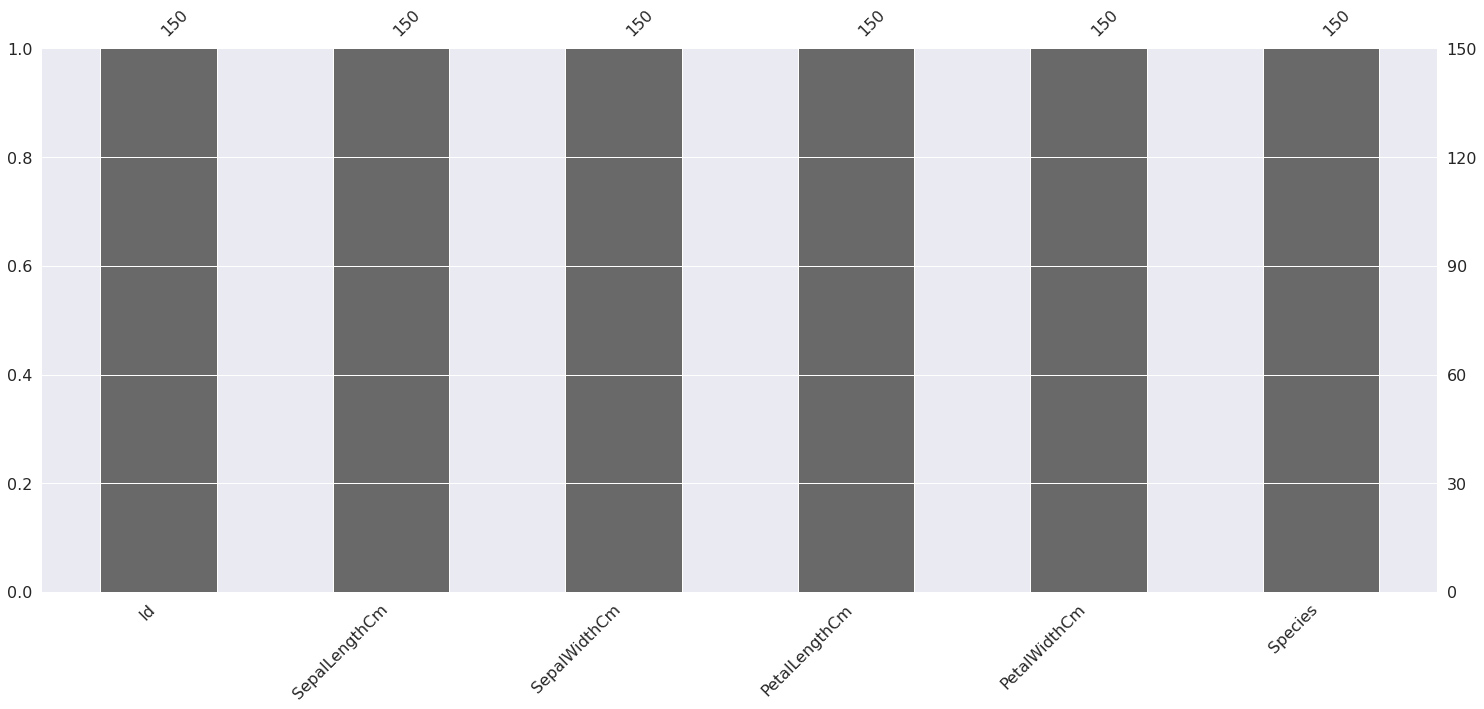

In [ ]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(iris_data)

**To check whether we have class imbalance, we have the following:**

???If we have class imbalance, what should we do?

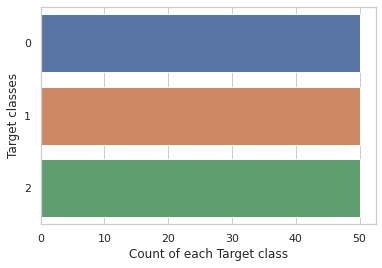

In [ ]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

**Early Insights :**
1. 150 rows
2. 4 Independent variables to act as factors
3. All have same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each). 

 **Bivariate EDA**

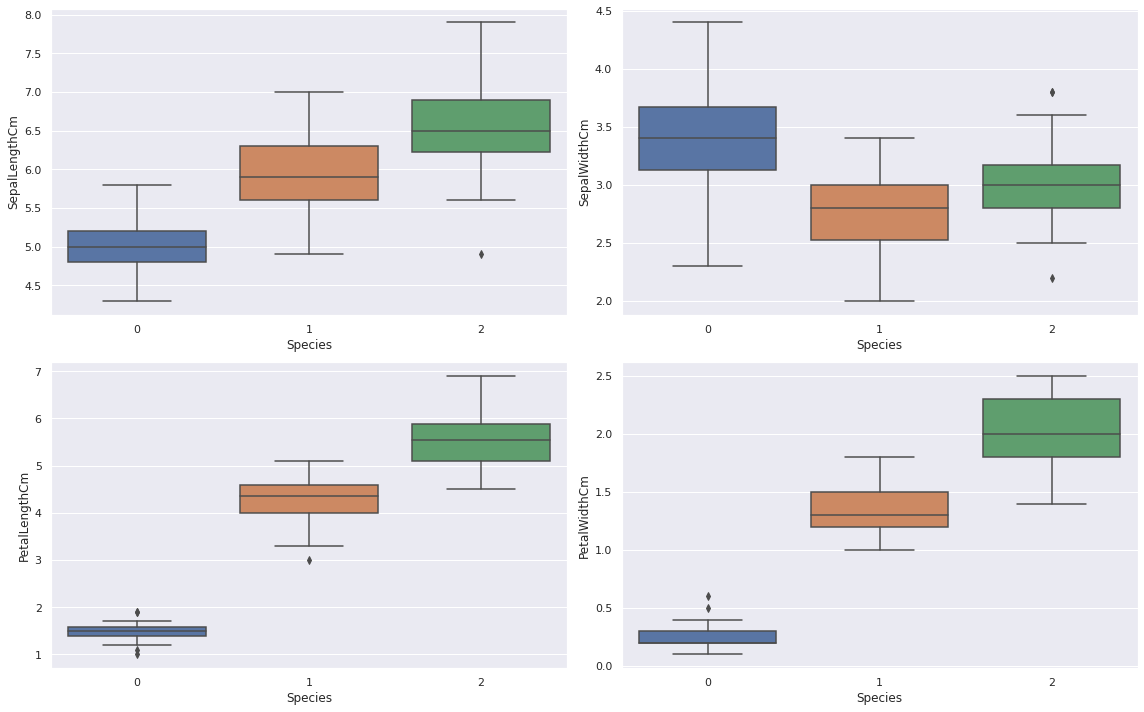

In [ ]:
iris_data = iris_data.loc[ : , iris_data.columns != 'Id']
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(iris_data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = iris_data['Species'], y = iris_data[iris_data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

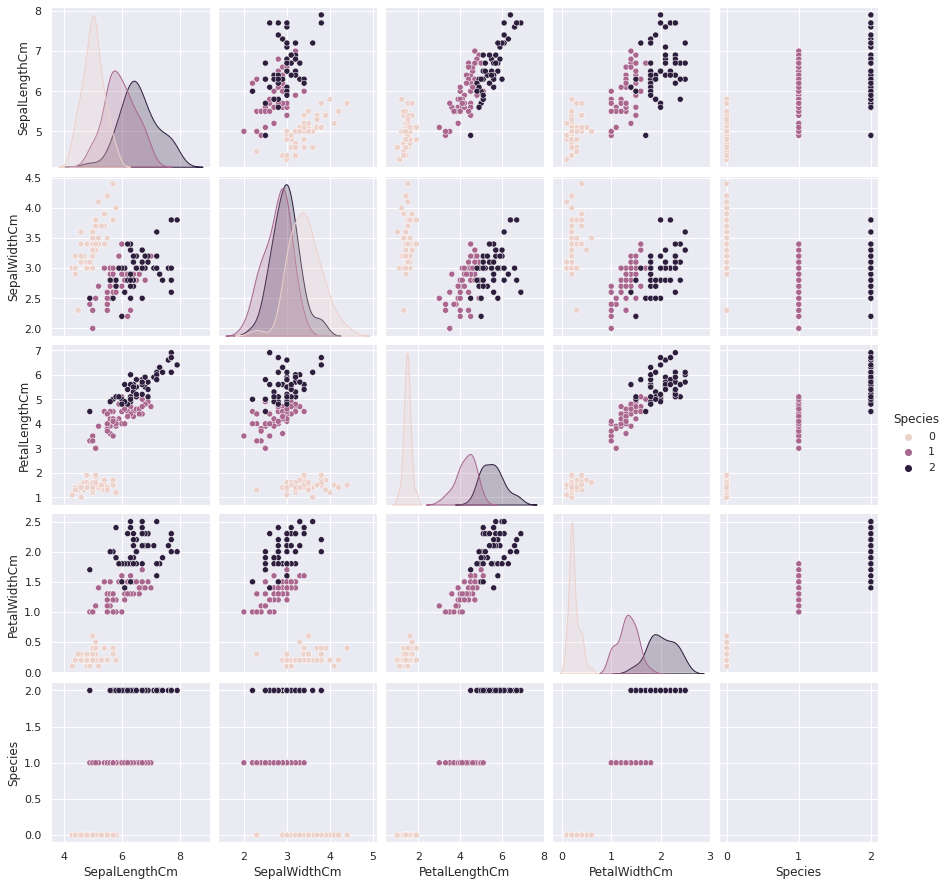

In [ ]:
p=sns.pairplot(iris_data, hue = 'Species',
               vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']) 
## Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

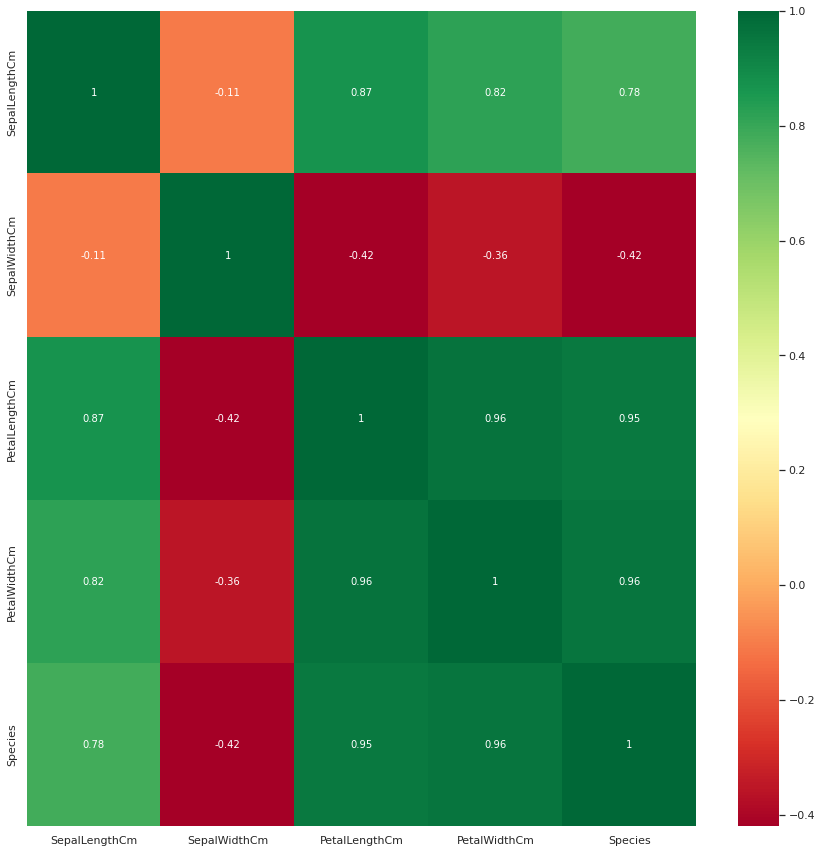

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris_data.corr(), annot=True,cmap='RdYlGn') 

**One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features.
** **bold text**

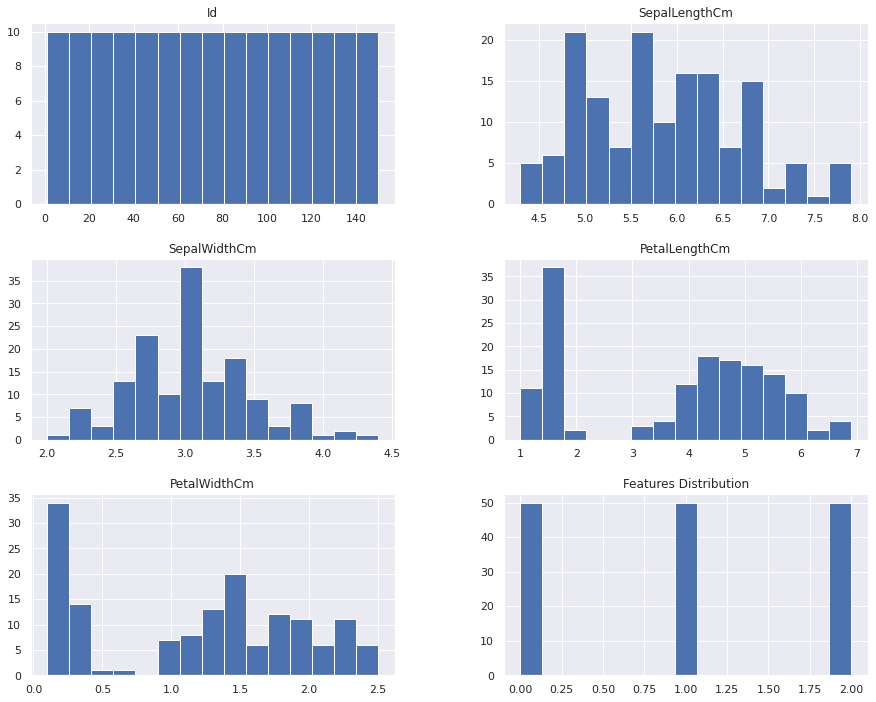

In [ ]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

**The histogram distributions don't seem to be ideal.**



**1.   Without PCA**







In [ ]:
## Split data to features and output
X = iris_data.drop(['Species'],axis=1)
#X.dtypes
#X.shape

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
X = X.drop(['Id'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = iris_data.Species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**Scaling features to a range**:

A standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

Here is an example to scale a iris data matrix to the [0, 1] range:

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)


In [ ]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train) #fit means training the model which is done on training data
X_train.dtype

dtype('float64')

The same instance of the transformer can then be applied to some new test data unseen during the fit call: the same scaling and shifting operations will be applied to be consistent with the transformation performed on the train data:

In [ ]:
X_test = scaler.transform(X_test)
X_test
X_test.dtype

dtype('float64')

In [ ]:
X_train.shape

In [ ]:
y_train.shape
type(y_train)

pandas.core.series.Series

In [ ]:
X_test.shape

(45, 4)

In [ ]:
y_test.shape

(45,)

In [ ]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


**2. With PCA**

Note that PCA is not a feature selection technique. It means PCA will not remove none of the features but only rotate the coordinates. PCA is a rotation of data from one coordinate system to another. After PCA applicationvon as our new coordinate system, the first dimension has the maximum variance it can, then the second dimension has the most of the remaining variance it can, and so on.PCA performs only on features and do not work on labels. This is why it is regarded as unsupervised learning methods.

In [ ]:
# We will have transformed train and test data
from sklearn.decomposition import PCA
pca=PCA(n_components=3) # Number of components to keep to train the model
#what does transform mean? the projection (transformation) of the original normalized data onto the reduced PCA space is obtained 
#by multiplying (dot product) the originally normalized data by the leading eigenvectors of the covariance matrix i.e. the PCs.
X_train_new = pca.fit_transform(X_train) # fit means train the model, transform means transforming data to low dimension
X_test_new = pca.transform(X_test)
type(X_train_new)
print(X_train_new)

In [ ]:
pca.get_covariance() # Each row represents one of the eigenvectors related to each feature

array([[ 0.06177627, -0.00816512,  0.06647609,  0.06321711],
       [-0.00816512,  0.034559  , -0.02716945, -0.02346872],
       [ 0.06647609, -0.02716945,  0.09427868,  0.09214546],
       [ 0.06321711, -0.02346872,  0.09214546,  0.09710298]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance #eigenvalue

array([0.84167361, 0.11469782, 0.03750616])

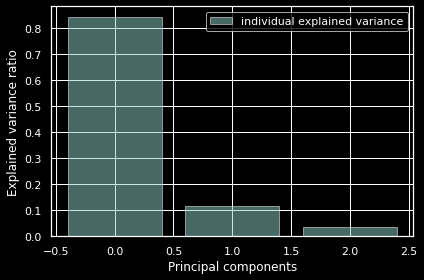

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train,y_train)
print("Train score after PCA",knn_pca.score(X_train,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test,y_test),"%")

Train score after PCA 0.9714285714285714 %
Test score after PCA 0.3333333333333333 %


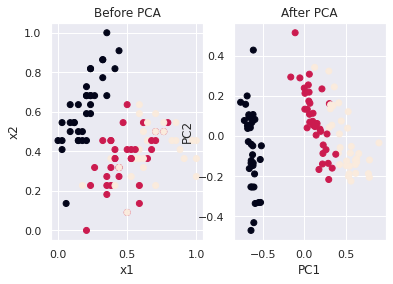

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_train_new[:,0], X_train_new[:,1], c=y_train)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

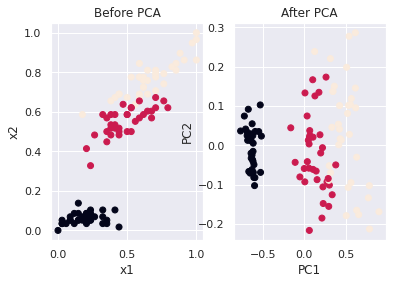

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X_train[:,0], X_train[:,2], c=y_train)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_train_new[:,0], X_train_new[:,2], c=y_train)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

As we conclude from previous figures, PCA can also help us gain insight into the classification power of our data. As we see, PCA is very useful to speed up the computation by reducing the dimensionality of the data. In the above figures, I decided to keep only two principle components or two dimensions, so I used scatter plot to show the variance of data according to each coordinate. Plus, when we have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model

**3. With t-SNE**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


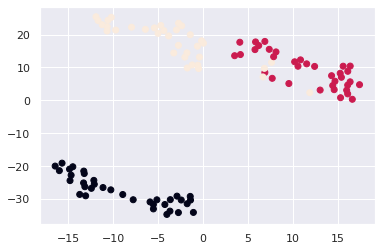

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=50)
x_new=tsne.fit_transform(X_train)

#plt.scatter(x_new[:,0],x_new[:,1], c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})]))

plt.scatter(
    x_new[:, 0],
    x_new[:, 1],
    c=y_train)
plt.show()

**It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) before t-SNE to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


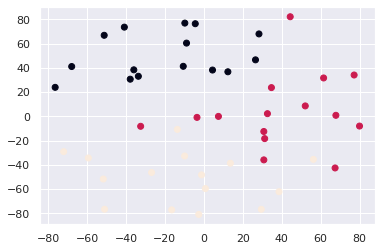

In [ ]:
# learning rate is important parameter between 5 and 50
tsne = TSNE(n_components=3,learning_rate=15) #size of axis 1 is 3
x_new=tsne.fit_transform(X_test)

plt.scatter(
    x_new[:, 0],
    x_new[:, 1],
    #c=[sns.color_palette()[x] for x in y_test.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
    c=y_test)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, perplexity=10, learning_rate=5)
x_new=tsne.fit_transform(X_train)

#plt.scatter(x_new[:,0],x_new[:,1], c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})]))

plt.scatter(
    x_new[:, 0],
    x_new[:, 2],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})],
)
plt.show()

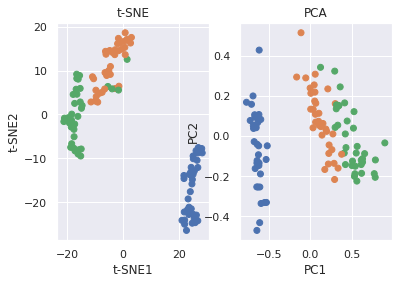

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(
    x_new[:, 0],
    x_new[:, 1],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])

axes[0].set_xlabel('t-SNE1')
axes[0].set_ylabel('t-SNE2')
axes[0].set_title('t-SNE')
axes[1].scatter(
    X_train_new[:, 0],
    X_train_new[:, 1],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('PCA')
plt.show()

As we see in the above figures, t-SNE perfomrs worst than PCA. Why?
t-SNE is something called nonlinear dimensionality reduction. What that means is this algorithm allows us to separate data that cannot be separated by any straight line and maybe the dataset I chose was not challenging enough which leaded to t-SNE outperformed PCA.

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 16.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=b6b87060aa87422ac9dc18052f6508784e94458919e8b020400bcd64c9d7b49c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8d82614e8dc338e8612ff74d8240c93f18c41fcc64c78e44c7edecd7e3892fd6
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
import umap
reducer = umap.UMAP()

Now we need to train our reducer, letting it learn about the manifold. For this UMAP follows the sklearn API and has a method fit which we pass the data we want the model to learn from. Since, at the end of the day, we are going to want to reduced representation of the data we will use, instead, the fit_transform method which first calls fit and then returns the transformed data as a numpy array.

In [ ]:
embedding = reducer.fit_transform(X_train)
embedding.shape

(105, 2)

Text(0.5, 1.0, 'UMAP projection of the iris dataset')

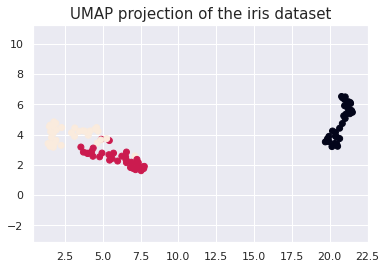

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=y_train)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the iris dataset', fontsize=15)

In [ ]:
embedding = reducer.fit_transform(X_test)
embedding.shape

(45, 2)

The result is an array with 105 samples, but only two feature columns (instead of the four we started with). This is because, by default, UMAP reduces down to 2D. Each row of the array is a 2-dimensional representation of the corresponding penguin. Thus we can plot the embedding as a standard scatterplot and color by the target array (since it applies to the transformed data which is in the same order as the original).

In [ ]:
embedding = reducer.fit_transform(X_test)
embedding.shape

(45, 2)

Text(0.5, 1.0, 'UMAP projection of the iris dataset')

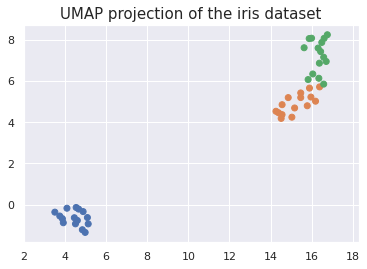

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_test.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the iris dataset', fontsize=15)

This does a useful job of capturing the structure of the data, and as can be seen from the matrix of scatterplots this is relatively accurate. Of course we learned at least this much just from that matrix of scatterplots – which we could do since we only had four different dimensions to analyse. If we had data with a larger number of dimensions the scatterplot matrix would quickly become unwieldy to plot, and far harder to interpret. 

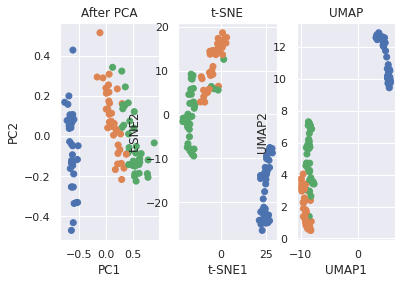

In [ ]:
fig, axes = plt.subplots(1,3)
axes[0].scatter(
    X_train_new[:, 0],
    X_train_new[:, 1],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('After PCA')
axes[1].scatter(
    x_new[:, 0],
    x_new[:, 1],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
axes[1].set_xlabel('t-SNE1')
axes[1].set_ylabel('t-SNE2')
axes[1].set_title('t-SNE')
axes[2].scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in y_train.map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})])
axes[2].set_xlabel('UMAP1')
axes[2].set_ylabel('UMAP2')
axes[2].set_title('UMAP')
plt.show()

**Feature Selection**

Note: We should be selecting features using TRAINING Dataset. Feature selection will be done first on a whole dataset as a training dataset, then using selected features, split them to train and test and use training data to train the model.

In machine learning, feature selection is the process of choosing a subset of input features that contribute the most to the output feature for use in model construction. Feature selection is substantially important if we have datasets with high dimensionality (i.e., large number of features). High-dimensional datasets are not preferred because they have lengthy training time and have high risk of overfitting. Feature selection helps to mitigate these problems by selecting features that have high importance to the model, such that the data dimensionality can be reduced without much loss of the total information. Some benefits of feature selection are:

Reduce training time

Reduce the risk of overfitting

Potentially increase model's performance

Reduce model's complexity such that interpretation becomes easier

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

**1. Filter Methods**

In filter methods, features are selected independently from any machine algorithms. Filter methods generally use a specific criteria, such as scores in statistical test and variances, to rank the importance of individual features. Filter methods have some advantages:

Because of their independency to the selection of machine learning algorithms, they can be used as the input of any machine learning models.
They are generally effective in computation time.
The main weakness of filter methods is that they do not consider the relationships among features. That's why they are mainly used as the pre-processing step of any feature selection pipeline. We will discuss three types of filter selection methods:

ANOVA F-value

Variance Threshold

Mutual Information

**1.1 ANOVA F-value**

ANOVA F-value method estimates the degree of linearity between the input feature (i.e., predictor) and the output feature. A high F-value indicates high degree of linearity and a low F-value indicates low degree of linearity. The main disadvantage of using ANOVA F-value is it only captures linear relationships between input and output feature. In other words, any non-linear relationships cannot be detected by F-value.

We can use Scikit-learn to calculate ANOVA F-value. First, we need to load the library. Scikit-learn has two functions to calculate F-value:

f_classif, which calculate F-value between input and output feature for classification task

f_regression, which calculate F-value between input and output feature for classification task

We will use f_classif because the Iris dataset entails classification task.

In [ ]:
# Import f_classif from Scikit-learn
from sklearn.feature_selection import f_classif #f_classif is a function to calculate F-value

In [ ]:
# Load Iris dataset from Scikit-learn
from sklearn.datasets import load_iris

# Create input and output features
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

# Show the first five rows of the dataset
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Then, we calculate F-value for each input feature in the Iris dataset by calling the following:

In [ ]:
# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


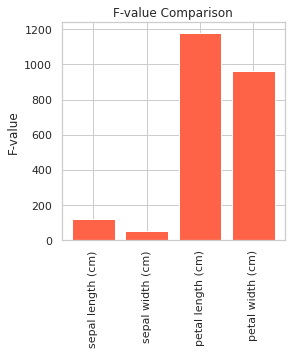

In [ ]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

**1.2. Variance Threshold**

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power.

**1.3. Mutual Information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative, and is zero if and only if the input and output feature are independent. Unlike ANOVA F-value, mutual information can capture non-linear relationships between input and output feature.

We can use Scikit-learn to calculate MI. Scikit-learn has two functions to calculate MI:

mutual_info_classif, which calculate MI for classification task

mutual_info_regression, which calculate MI for regression task

We will use mutual_info_classif because the Iris dataset entails a classification task.

In [ ]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


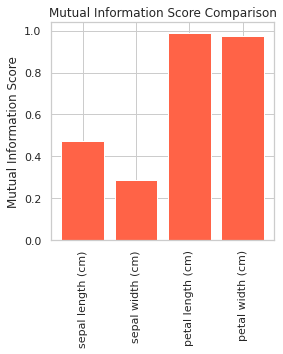

In [ ]:
# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

**1.4. Using Selector Object for Selecting Features**

We can use SelectKBest from Scikit-learn to select features according to the k highest scores, determined by a filter method. 

First, we need to import SelectKBest.

In [ ]:
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest

SelectKBest has two important parameters:

score_func: the filter function that is used for feature selection

k: the number of top features to select

Let's demonstrate SelectKBest by using ANOVA F-value as our filter method. We will select the top two features based on the ANOVA F-value.

In [ ]:
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 4
Number of features after feature selection: 2


In [ ]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


In [ ]:

# Create a SelectKBest object
skb = SelectKBest(score_func=mutual_info_classif, # Set mutual_info_classif as our criteria to select features
                  k=3)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 4
Number of features after feature selection: 3


In [ ]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- sepal length (cm)
- petal length (cm)
- petal width (cm)


**2.0. Wrapper Methods**

**2.1. Exhaustive Feature Selection (EFS)**

EFS finds the best subset of features by evaluating all feature combinations. Suppose we have a dataset with three features. EFS will evaluate the following feature combinations:

feature_1

feature_2

feature_3

feature_1 and feature_2

feature_1 and feature_3

feature_2 and feature_3

feature_1, feature_2, and feature_3

EFS selects a subset that generates the best performance (e.g., accuracy, precision, recall, etc.) of the model being considered.

Mlxtend provides ExhaustiveFeatureSelector function to perform EFS.

In [ ]:
!pip install mlxtend.feature_selection

ERROR: Could not find a version that satisfies the requirement mlxtend.feature_selection (from versions: none)
ERROR: No matching distribution found for mlxtend.feature_selection


In [ ]:
# Import ExhaustiveFeatureSelector from Mlxtend
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

EFS has five important parameters:

estimator: the classifier that we intend to train

min_features: the minimum number of features to select

max_features: the maximum number of features to select

scoring: the metric to use to evaluate the classifier

cv: the number of cross-validations to perform

In this example, we use logistic regression as our classifier/estimator.

In [ ]:
# Import logistic regression from Scikit-learn
from sklearn.linear_model import LogisticRegression

Then, we perform EFS by calling the following:

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=3,      # The maximum number of features to consider is 3
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 
                                                                     # that yield the best score

Features: 14/14

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [ ]:
# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 3


In [ ]:
type(X_data_new)

numpy.ndarray

In [ ]:
# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


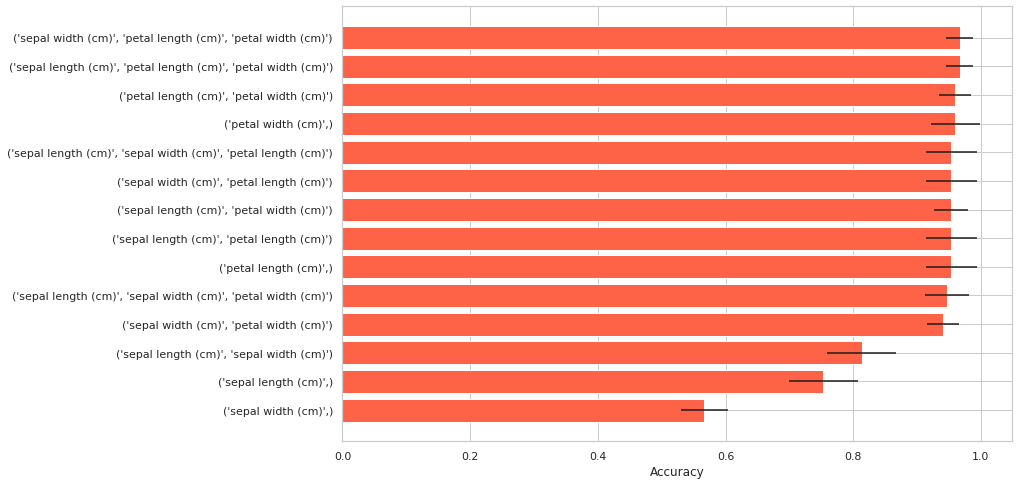

In [ ]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(12,8))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, 
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

**2.2. Sequential Forward Selection (SFS)**

SFS finds the best subset of feature by adding a feature that best improves the model at each iteration.

In [ ]:
# Import SequentialFeatureSelector from Mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 3),  # Consider any feature combination between 1 and 3
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [ ]:
# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 3


In [ ]:
# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."


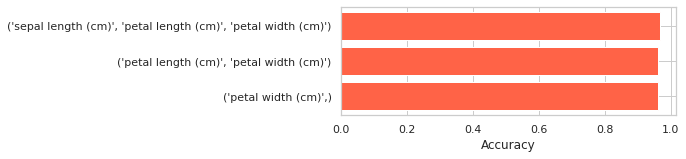

In [ ]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

**2.3. Sequential Backward Selection (SBS)**

SBS is the opposite of SFS. SBS starts with all features and removes the feature that has the least importance to the model at each iteration.

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SBS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 3),  # Consider any feature combination between 1 and 3
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SBS with our dataset
sbs = sbs.fit(X_data.values, y_data, custom_feature_names=feature_names)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


We can transform the dataset into a new dataset containing only the subset of features that generates the best score by using transform method.

In [ ]:
# Transform the dataset
X_data_new = sbs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 4
Number of features after transformation: 3


We can see the performance of each subset of features considered by SFS by calling subsets_.

In [ ]:
# Show the performance of each subset of features considered by SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

,feature_idx,cv_scores,avg_score,feature_names
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le..."
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w..."
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))"
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)"


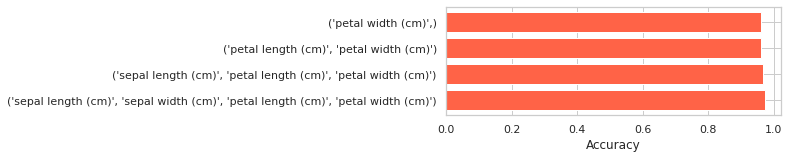

In [ ]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, 
        sbs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

Let's compare the selection generated by EFS, SFS, and SBS.

In [ ]:
# Compare the selection generated by EFS, SFS, and SBS
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

Best subset by EFS: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SFS: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SBS: ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In this simple scenario, selecting the best combination of features out of the 3 available features in the Iris set, we end up with similar results regardless of which selection algorithms we used. In other cases with larger dataset and higher number of features, the selection is highly likely to be different for each selection algorithm.

References:
https://www.kaggle.com/ar2017/basics-of-feature-selection-with-python

https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/

Why, How and When to apply Feature Selection

Introduction to Feature Selection methods with an example

An Introduction to Feature Selection

Beginner's Guide to Feature Selection in Python

Sequential Feature Selector

**Do I need to split data to train and test before visuallization with PCA, t-SNE and UMAP?**

PCA, t-SNE and UMAP can be done on the whole data set so long as you don't need to build your model in advance of knowing the data you are trying to predict. So, we don't need to split data for using these methods. Only splitting to features and labels is enough. 

**Filter methods:**

Filter methods are performed separately from the model.These methods work on features(training feutures) not labels and then a new selection of training features are imported to the model to train and then test datasets. So, before performing filter and wrapper methods, we need to define the model. So, we need to first split data to train and test. Then implementing filter methods on training data and then the selection of training feutures as a result of using filter techniques is used as the training set in the model. So, these methods are working independantly from the model but their result is using in the model.

Filter methods:

F-Test, Chi-Square Test & Mutual Information

Reference:

file:///D:/Documents/Universities/Wayne%20State%20University/Courses/Winter%202022/IE7860%20Intelligent%20Analytics/HW/HW3/FeatureSelectionAndVisualization_with_BreastCancer_Dataset%20(1).html


**Wrapper methods:**

Such as Recursive Feature Elimination with Cross-Validation

Given an external estimator(or classifier like MLP classifie, Random Forest classifier, logistic regression classifier and ...) that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

Now we will not only find best features but we also find how many features do we need for best accuracy.

The whole stepsto do PCA or t-SNE or UMAP are:
construct a model,

train the model with fit,

and then look at the transformed data with transform. 

Reference:

https://umap.scikit-tda.org/basic_usage.html
